## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [12]:
# Import necessary libraries
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [18]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

X,y = make_classification(n_samples=1000, n_features=8, n_informative=5,\
                           class_sep = 2, random_state=42)
dataDF = pd.DataFrame(X,y)
print(dataDF.head())
print(dataDF.info())
print(dataDF.describe())

          0         1         2         3         4         5         6  \
0 -0.756153 -1.164471 -0.705182  1.108321 -1.078425  0.990766  1.363777   
0 -0.349763 -0.725064 -0.776536  0.164623 -2.123291 -0.312199  0.081420   
1 -4.390672 -1.590640 -1.343470  9.286103  2.222753  1.085890 -2.715076   
1  1.064793  0.967040 -0.723131 -3.114630  0.798928  0.214848  1.890636   
0 -0.561940 -1.914989  0.953398  1.090123 -1.048063 -0.600604  1.511169   

          7  
0  1.727296  
0  1.073886  
1  4.223089  
1 -2.379626  
0  0.550706  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   

In [14]:
# Check duplicate values and missing data.
print("sum of duplicated values:",dataDF.duplicated().sum())
print("null data: \n\n",dataDF.isnull().sum())
print("na values: \n\n",dataDF.isna().sum())

sum of duplicated values: 0
null data: 

 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
na values: 

 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


<Figure size 1152x576 with 0 Axes>

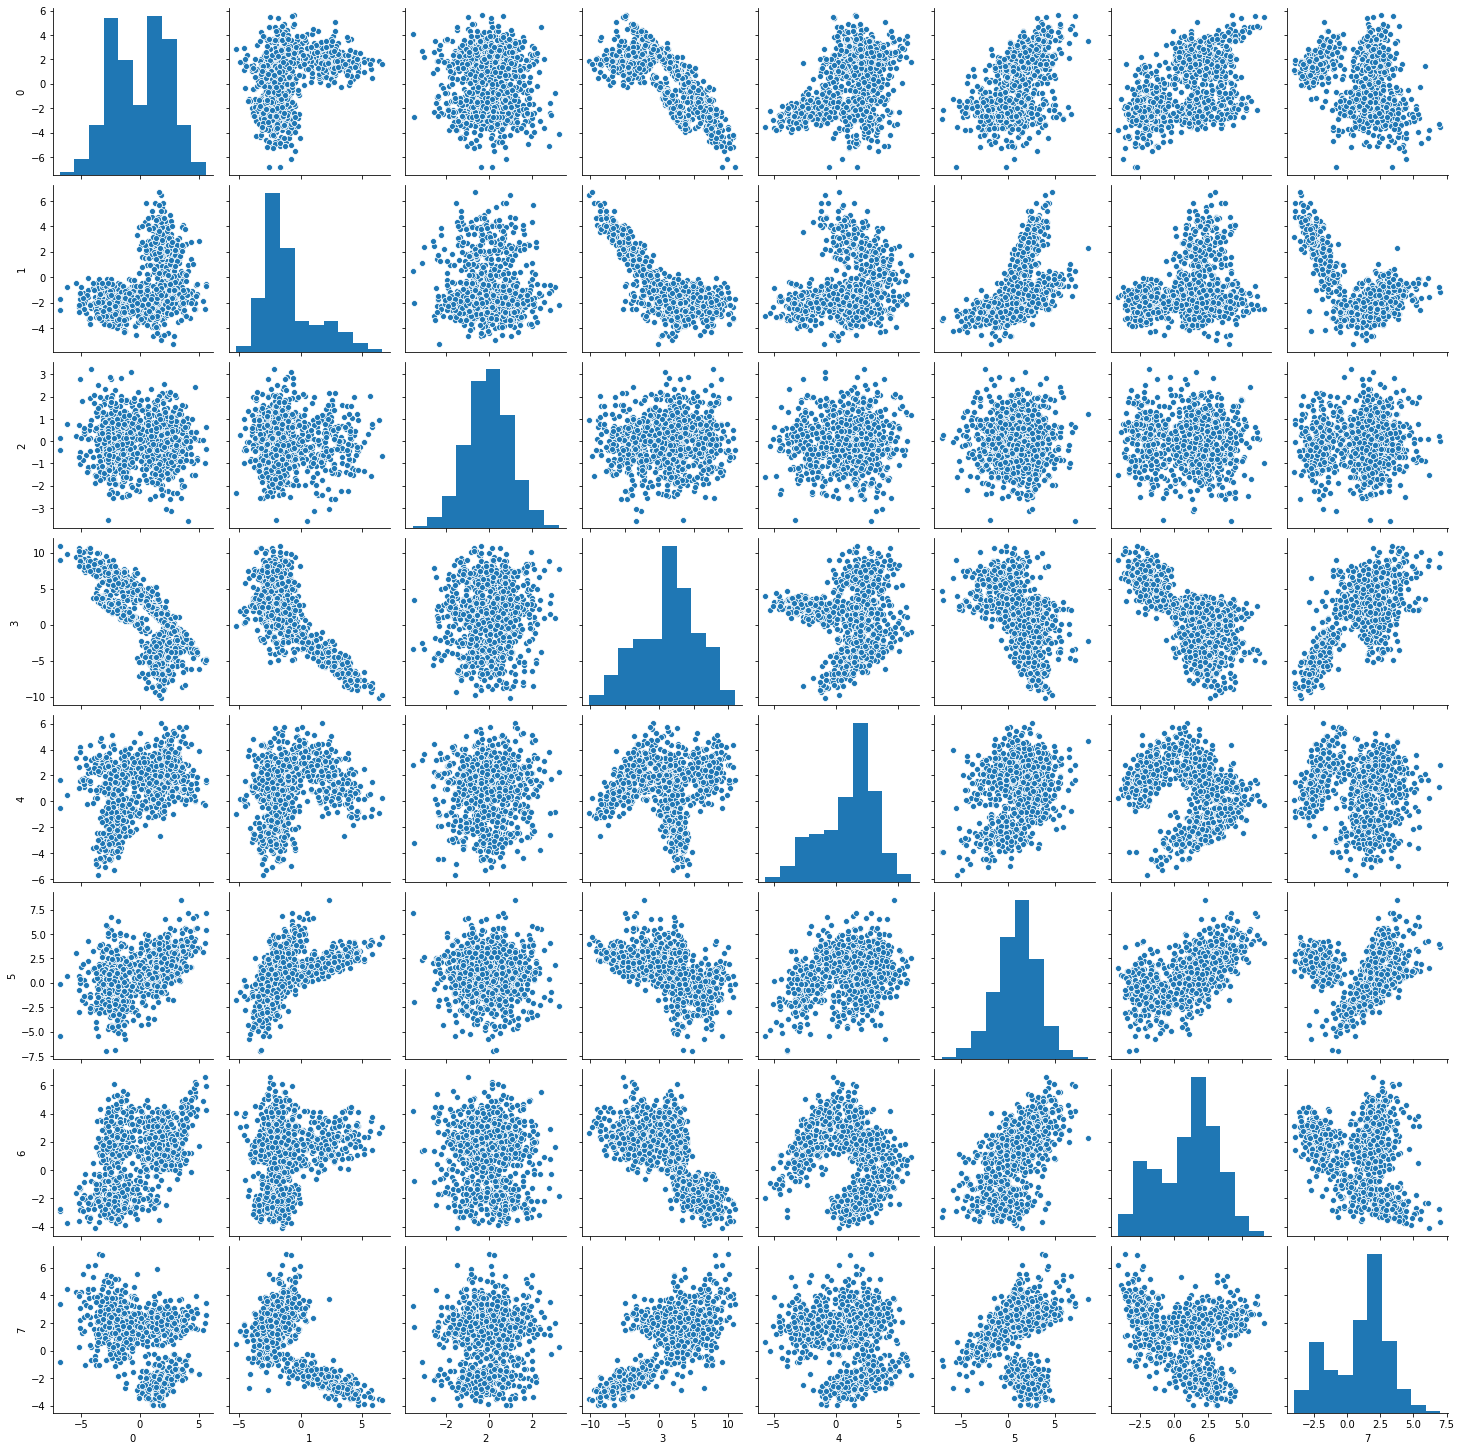

In [10]:
# Visualize data for each feature (pairplot,distplot).

plt.figure(figsize=(16, 8))
sns.pairplot(dataDF)

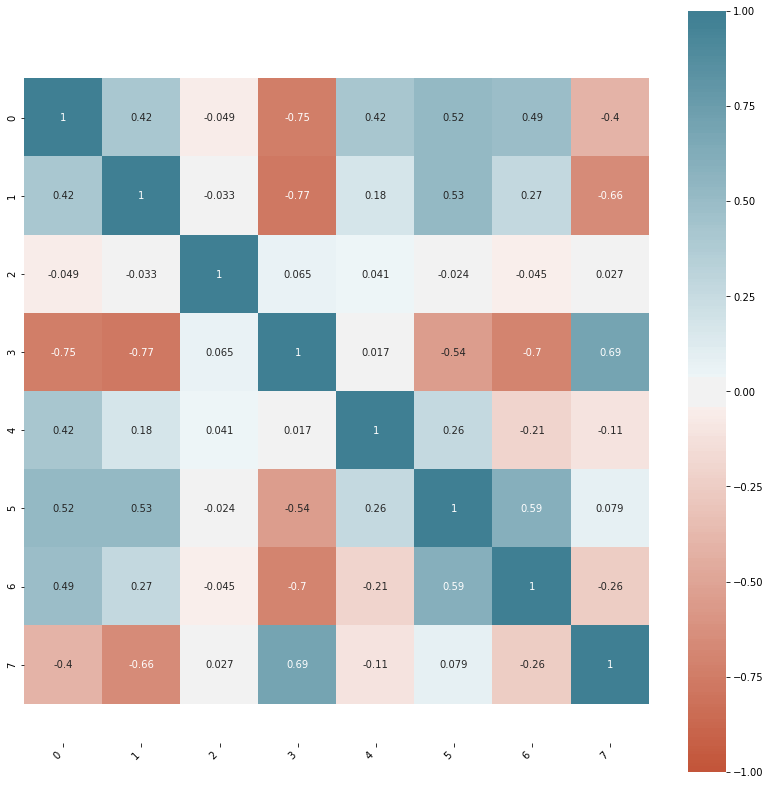

In [16]:
# Draw correlation matrix.
corr = dataDF.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [ ]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

In [19]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(300, 8)
(700, 8)
(300,)
(700,)


/home/halil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [31]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))


Accuracy of train: 0.97
Accuracy of test: 0.9633333333333334


(700, 8)

[0.00558273 0.         0.00076341 0.         0.08340806 0.
 0.52631409 0.38393171]


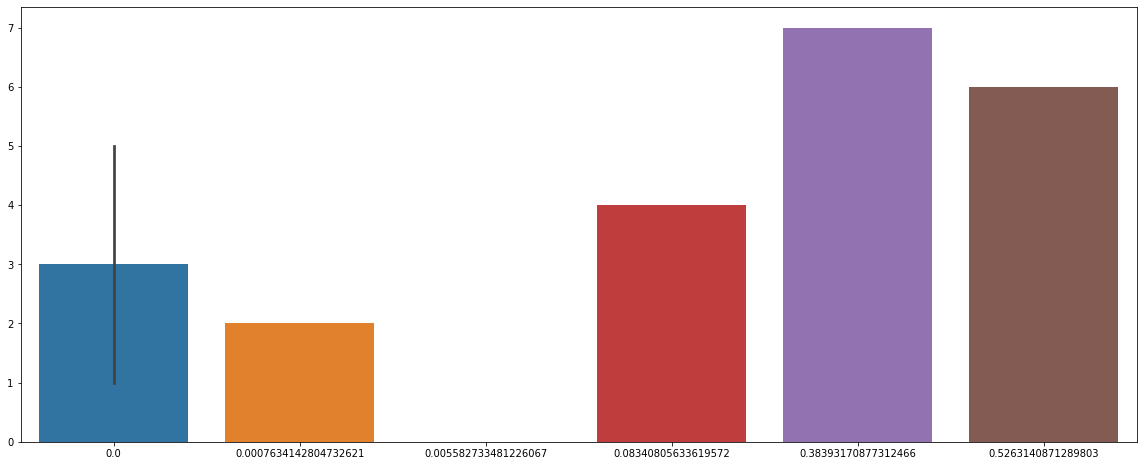

In [46]:
# Visualize feature importances.

plt.figure(figsize=(20, 8))
importance = clf.feature_importances_
print(importance)
sns.barplot(y=range(0,8), x=importance)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       139
           1       0.98      0.95      0.97       161

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Precision = 0.9626068376068375
Recall = 0.9643639125966308
Accuracy = 0.9633333333333334
F1 Score = 0.9632152132960283


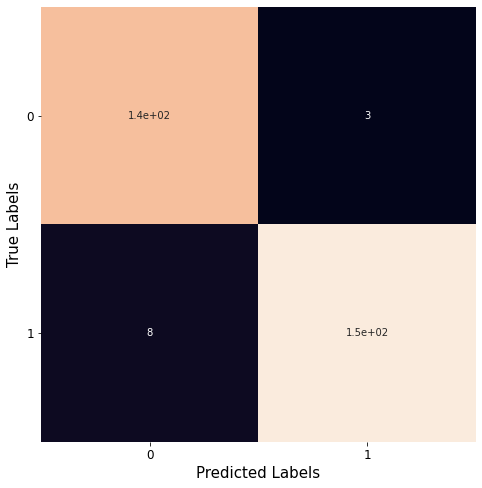

In [50]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

from sklearn.metrics import confusion_matrix

categories=range(0,8)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

In [ ]:
# Visualize feature importances.

In [ ]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

In [ ]:
# Evaluate your result and select best performing algorithm for our case.